# Feature Engineering

Feature engineering helps in making the available data better suited for the task at hand.  
In an ML project, if we have a lot of features, we can try to find the association between the feature and the target variable. Then, we can rank them and take a subset of features.  

In [37]:
import numpy as np
import pandas as pd

## Mutual Information

1. To get assiociation we use a metric called `mutual information`. It measures the realtionship between two quantities similar to correlation. While correlation measures linear relationships, MI measures all kind of relationships.  
2. Mutual Information describes relationships in terms of *uncertainity*. The MI bw 2 quantities is the measure of  the extent to which knowledge of one quantity reduces uncertainty about the other. If you knew the value of a feature, how much more confident would you be about the target?  
3. If MI is 0, the feature cannot tell anything about the target. MI is logarthmic, so value above 2.0 is extraordinary.
4. MI is univariate. It cant detect interactions bw features, so a feature maybe totally indepenent of result but combining it with other features gives good results.
5. Even if a feature has high MI score, your model may not be able to detect it.  

In [38]:
df = pd.read_csv("C:/Users/SAKET/Downloads/Automobile_data.csv")

In [39]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In sklearn, MI algorithm treats discrete variables different than continous variables. Anything with float value is not considered discrete. Categorical variables will be treated discrete if we use label encoding.

In [61]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [66]:
X = df.copy()
y = X.pop("price")

print(list(X.select_dtypes(["object", "category"])))
for col in X.select_dtypes("object"):
    X[col], gg = X[col].factorize()
discrete_features = X.dtypes == int

['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower', 'peak-rpm']


In [67]:
discrete_features = X.dtypes == int

In [68]:
X.dtypes == int

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
dtype: bool

In sklearn feature_selection we have two important functions for MI - mutual_info_regression for real values and mutual_info_classif for classification

In [33]:
from sklearn.feature_selection import mutual_info_regression

In [35]:
def scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features = discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns).abssort_values(ascending = False)
    return mi_scores

In [36]:
mi_scores = scores(X, y, discrete_features)

ValueError: could not convert string to float: '?'

In [58]:
mi_scores

NameError: name 'mi_scores' is not defined

In [59]:
import seaborn as sns

F:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


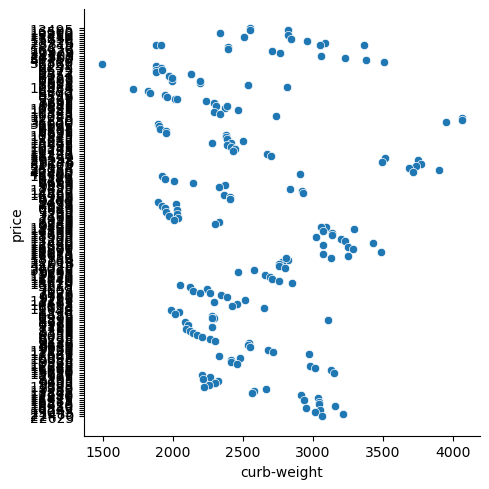

In [62]:
sns.relplot(x = "curb-weight",  y = "price", data = df)

# Creating Features

We need to update features to learn more about how they are related to the output as well as other features. We can reshape them, transform them, etc. 